# Creditcard Fraud Detection

# Introduction¶
- The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.  
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation.
- Due to confidentiality issues, there are not provided the original features and more background information about the data.

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

To build a model to predict fraudulent transactions, we can follow these steps:

1. Data Preprocessing: Handle missing values, scale features, etc.
2. Exploratory Data Analysis (EDA): Understand data distributions, relationships, and imbalances.
3. Model Selection and Training: Choose and train machine learning models.
4. Model Evaluation: Evaluate model performance using appropriate metrics.

In [2]:
creditcard = pd.read_csv(r"C:\Users\Admin\Downloads\archive (9)\creditcard.csv")

# 1. Data Preprocessing

In [3]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset consists of the following columns:

- Time: The time elapsed between this transaction and the first transaction in the dataset.
- V1, V2, ..., V28: The result of a PCA transformation. These are anonymized features.
- Amount: The transaction amount.
- Class: The response variable (0 means no fraud, 1 means fraud)

In [4]:
creditcard.shape

(284807, 31)

In [5]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 2. EDA

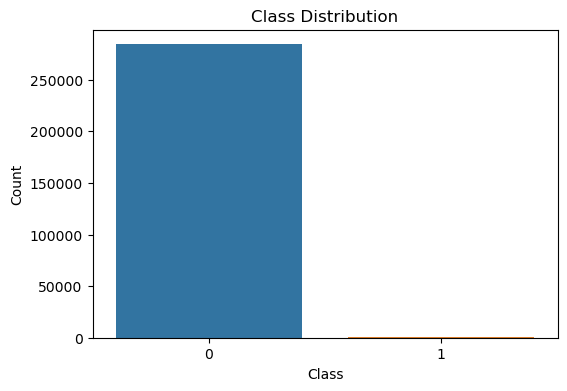

In [37]:
# Plot the distribution of the 'Class' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=creditcard)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


it gives a visual representation of the distribution of transactions between the two classes (fraudulent and non-fraudulent)

here it is clearly shows that this dataset is having class imbalance.

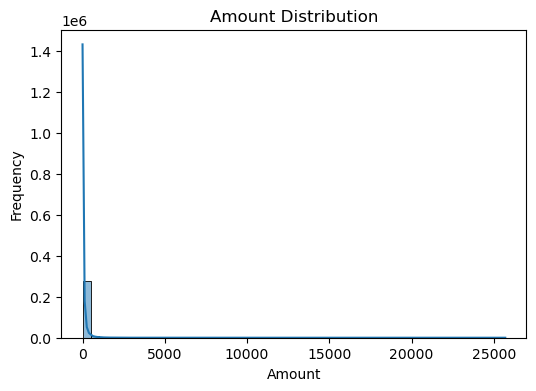

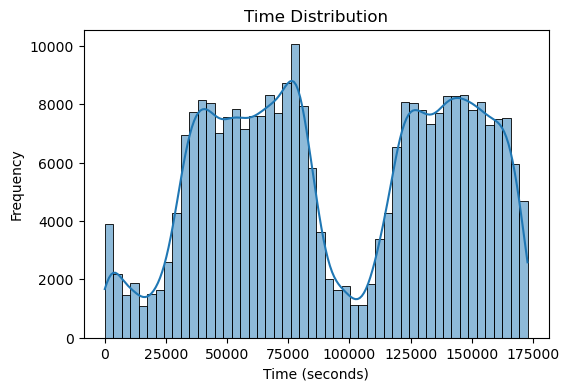

In [38]:
# Plot the distribution of the 'Amount' variable
plt.figure(figsize=(6, 4))
sns.histplot(creditcard['Amount'], bins=50, kde=True)
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'Time' variable
plt.figure(figsize=(6, 4))
sns.histplot(creditcard['Time'], bins=50, kde=True)
plt.title('Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


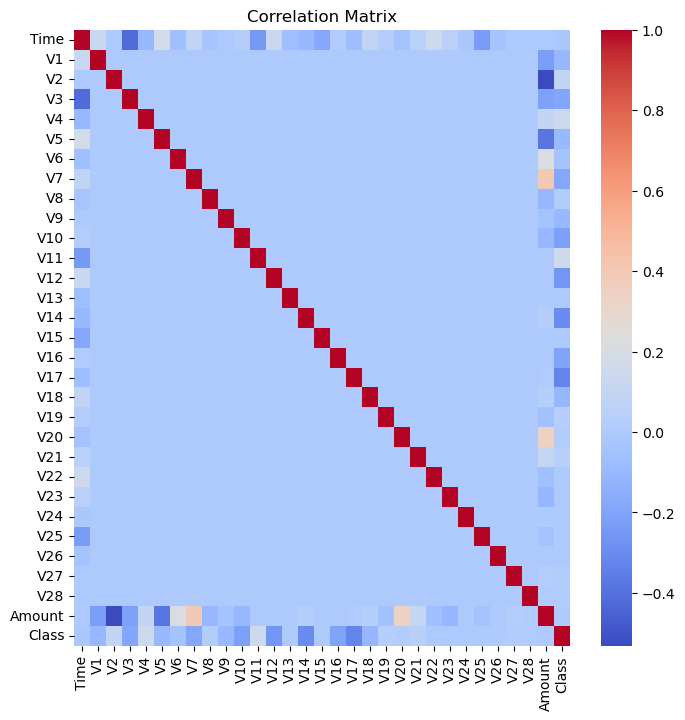

In [43]:
# Compute and plot the correlation matrix
plt.figure(figsize=(8, 8))
corr_matrix = creditcard.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Model Selection and training

In [8]:
from sklearn.model_selection import train_test_split

creditcard_train, creditcard_test = train_test_split(creditcard, test_size=.2)

In [9]:
X = creditcard.drop(columns='Class')
y = creditcard['Class']

In [10]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression

In [11]:
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Handle Class Imbalance:

- SMOTE is used to handle class imbalance and to create a balanced training set

In [13]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [14]:
# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = logreg.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[55406,  1458],
       [    8,    90]], dtype=int64)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [17]:
# 2. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [25]:
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [26]:
y_pred = logreg.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[55406,  1458],
       [    8,    90]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:
# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [30]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [31]:
y_pred = rfc.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[56848,    16],
       [   19,    79]], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.81      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# 4. Model Evaluation

Metrics for Random Forest Explanation

1. Precision: This measures the accuracy of the positive predictions. Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.                                                  For class 1 (fraud), the precision is 0.83, meaning 83% of the transactions predicted as fraud are actually fraud.

2. Recall: This measures the model’s ability to identify all relevant instances.                                       Recall is defined as the number of true positives divided by the number of true positives plus the number of false negatives.                                                                                                                For class 1, the recall is 0.81, meaning 81% of the actual fraudulent transactions were correctly identified.

3. F1-score: This is the harmonic mean of precision and recall.                                                              It gives a single metric that balances both precision and recall.                                                         For class 1, the F1-score is 0.82.

4. Accuracy: This is the overall accuracy of the model, calculated as the number of correct predictions divided by the total number of predictions.                                                                                              The model has an accuracy of 1.00, meaning it correctly classified nearly all transactions.

Practically, the model is highly effective at identifying non-fraudulent transactions but needs improvement in detecting fraudulent ones. The false negatives (missed fraudulent transactions) are a critical area for improvement, as they represent potential financial loss and security risks.